## Candidate Number: 660050171
## Database URL: https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Part 1: Data Handling and analysis

In [2]:
df= pd.read_csv("C:\\Users\\Yudhis\\Downloads\\framingham_heart_disease.csv")#importing the data


In [3]:
df=df.drop(['education'],axis=1) # dropping education as too many NaNs
print(df.shape)
print(df.head())

(4238, 15)
   male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39              0         0.0     0.0                0   
1     0   46              0         0.0     0.0                0   
2     1   48              1        20.0     0.0                0   
3     0   61              1        30.0     0.0                0   
4     0   46              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0  


In [5]:
print('CHD Counts: '+ str(len(df.loc[df.TenYearCHD==1])))
print('control Counts: '+ str(len(df.loc[df.TenYearCHD==0])))
## number of counts of eachclasses

CHD Counts: 644
control Counts: 3594


In [6]:
df.isna().sum()## number of remaining NaN values

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

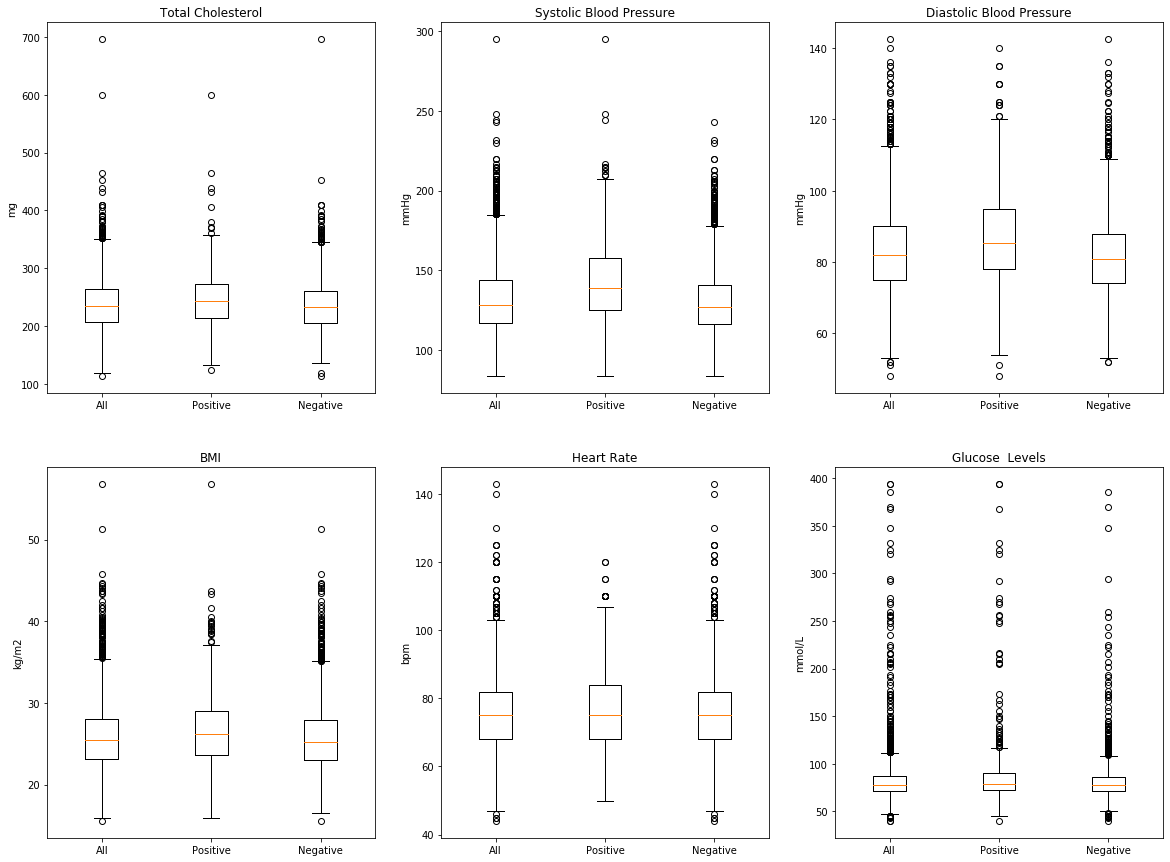

In [7]:
## creating Box plots
df2=df.dropna()## dropping Nan values
df3=df2.iloc[:,8:-1]

dfpos=df2.loc[df2['TenYearCHD']==1]
dfpos=dfpos.iloc[:,8:-1]

dfneg=df2.loc[df2['TenYearCHD']==0]
dfneg=dfneg.iloc[:,8:-1]## only selecring columns with continous data
#Create seperate dataframes for all positive and negative diabetes
labels={'title':['Total Cholesterol','Systolic Blood Pressure',
                 'Diastolic Blood Pressure' ,'BMI','Heart Rate','Glucose  Levels'],
 'y':['mg','mmHg','mmHg','kg/m2','bpm','mmol/L']}
#labels for the titles and units
fig, axes = plt.subplots(2, 3, figsize=(20,15))
#plotting features in boxplots
for col, ax, i in zip(df3.columns, axes.flatten(),range(6)):
    data = [df3[col],dfpos[col],dfneg[col]]
    ax.boxplot(data)
    x=labels['title']
    y=labels['y']
    ax.set_title(x[i])
    ax.set_ylabel(y[i])
    ax.set_xticklabels(['All','Positive','Negative'])

In [8]:
df=df2# new df is without NaN

In [9]:
df['TenYearCHD'].value_counts()#new counts of classes

0    3177
1     572
Name: TenYearCHD, dtype: int64

## Part 2: Data manipulation (normalising and oversampling)

In [10]:
X=df.iloc[:,:-1]# X data, all features
X=((X-X.min())/(X.max()-X.min()))# Normalising so its on a scale of 0 and 1
y=df.iloc[:,-1] # set the labels
dfCHD= pd.concat([X, y],axis=1)# new DF

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=1)
print(y_test.value_counts())
print(y_train.value_counts())
print(y_val.value_counts())
# Here we split the train into test, firstly the train and test, 75% and 25%,
# andthen split the train data into train and validation, which  is 10% of the train

0    784
1    154
Name: TenYearCHD, dtype: int64
0    2154
1     375
Name: TenYearCHD, dtype: int64
0    239
1     43
Name: TenYearCHD, dtype: int64


In [15]:
train=X_train
train['target']=y_train
from sklearn.utils import resample
train_1=train.loc[train['target']==1].reset_index(drop=True)
train_0=train.loc[train['target']==0].reset_index(drop=True)
print(train_1.shape)
print(train_0.shape)
## resampling the dataset, this is the shapes of the train set for each 

(375, 15)
(2154, 15)


In [16]:
from sklearn.utils import resample
train_1_resampled = resample(train_1, n_samples =train_0.shape[0])
train_1_resampled.shape
## resampling the minority class into the size of the majority

(2154, 15)

In [17]:
resampled = pd.concat([train_0, train_1_resampled])
X_train = np.array(resampled.drop('target', axis=1))
y_train = np.array(resampled['target'])

X_train=pd.DataFrame(X_train, columns =X_test.columns)
y_test=np.array(y_test)
# combining the 2 and re setting the train data

In [18]:
val=X_val
val['target']=y_val
val_1=val.loc[val['target']==1].reset_index(drop=True)
val_0=val.loc[val['target']==0].reset_index(drop=True)
val_1_resampled = resample(val_1, n_samples =val_0.shape[0])
resampled2 = pd.concat([val_0, val_1_resampled])
X_val = np.array(resampled2.drop('target', axis=1))
y_val = np.array(resampled2['target'])

X_val=pd.DataFrame(X_val, columns =X_test.columns)
y_val=np.array(y_val)
# repeat for val

## Part 3: Deep learning

In [20]:
from sklearn.preprocessing import LabelEncoder
def prepare_y(y):
    le = LabelEncoder()
    le.fit(y_train)
    
    y_test_enc = le.transform(y)
    return y_test_enc

In [21]:
y_test= prepare_y(y_test)
y_train= prepare_y(y_train)
y_val= prepare_y(y_val)
# preparinig label encoder for deep learning

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from keras.layers import Dense, Input
from keras.layers import Dropout 
import keras.utils
from keras import utils as np_utils
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
def get_model(input_size, n_hidden, n_neurons, activation, 
              dropout, d_rate):
    """
    Function to set the  model
    """
    #The first input
    model = Sequential()

    #input layer.
    model.add(Input(shape=(input_size,)))

    for i in range(n_hidden):
        #hidden layers 
        model.add(Dense(units=n_neurons, activation=activation))
        #include a dropout layer
        if dropout:
            model.add(Dropout(d_rate))
    
    #output layer
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model
# function to get model

Epoch 1/100
120/120 [==============================] - 0s 891us/step - loss: 0.6601 - accuracy: 0.6316
Epoch 2/100
120/120 [==============================] - 0s 932us/step - loss: 0.6316 - accuracy: 0.6729
Epoch 3/100
120/120 [==============================] - 0s 953us/step - loss: 0.6170 - accuracy: 0.6760
Epoch 4/100
120/120 [==============================] - 0s 914us/step - loss: 0.6071 - accuracy: 0.6850
Epoch 5/100
120/120 [==============================] - 0s 873us/step - loss: 0.6002 - accuracy: 0.6848
Epoch 6/100
120/120 [==============================] - 0s 839us/step - loss: 0.5956 - accuracy: 0.6901
Epoch 7/100
120/120 [==============================] - 0s 864us/step - loss: 0.5912 - accuracy: 0.6901
Epoch 8/100
120/120 [==============================] - 0s 814us/step - loss: 0.5890 - accuracy: 0.6929
Epoch 9/100
120/120 [==============================] - 0s 740us/step - loss: 0.5863 - accuracy: 0.6952
Epoch 10/100
120/120 [==============================] - 0s 817us/step - l

120/120 [==============================] - 0s 823us/step - loss: 0.5588 - accuracy: 0.7138
Epoch 57/100
120/120 [==============================] - 0s 834us/step - loss: 0.5583 - accuracy: 0.7156
Epoch 58/100
120/120 [==============================] - 0s 857us/step - loss: 0.5581 - accuracy: 0.7149
Epoch 59/100
120/120 [==============================] - 0s 809us/step - loss: 0.5573 - accuracy: 0.7161
Epoch 60/100
120/120 [==============================] - 0s 810us/step - loss: 0.5574 - accuracy: 0.7140
Epoch 61/100
120/120 [==============================] - 0s 826us/step - loss: 0.5575 - accuracy: 0.7161
Epoch 62/100
120/120 [==============================] - 0s 878us/step - loss: 0.5576 - accuracy: 0.71520s - loss: 0.5566 - accuracy: 0.
Epoch 63/100
120/120 [==============================] - 0s 805us/step - loss: 0.5563 - accuracy: 0.7145
Epoch 64/100
120/120 [==============================] - 0s 846us/step - loss: 0.5555 - accuracy: 0.7173
Epoch 65/100
120/120 [=======================

Epoch 33/100
120/120 [==============================] - 0s 824us/step - loss: 0.5633 - accuracy: 0.7156
Epoch 34/100
120/120 [==============================] - 0s 817us/step - loss: 0.5636 - accuracy: 0.7110
Epoch 35/100
120/120 [==============================] - 0s 786us/step - loss: 0.5634 - accuracy: 0.7196
Epoch 36/100
120/120 [==============================] - 0s 858us/step - loss: 0.5625 - accuracy: 0.71490s - loss: 0.5665 - accuracy: 0.
Epoch 37/100
120/120 [==============================] - 0s 819us/step - loss: 0.5633 - accuracy: 0.7122
Epoch 38/100
120/120 [==============================] - 0s 849us/step - loss: 0.5615 - accuracy: 0.7140
Epoch 39/100
120/120 [==============================] - 0s 848us/step - loss: 0.5611 - accuracy: 0.7152
Epoch 40/100
120/120 [==============================] - 0s 821us/step - loss: 0.5605 - accuracy: 0.7182
Epoch 41/100
120/120 [==============================] - 0s 865us/step - loss: 0.5600 - accuracy: 0.7173
Epoch 42/100
120/120 [==========

120/120 [==============================] - 0s 829us/step - loss: 0.5427 - accuracy: 0.7275
Epoch 86/100
120/120 [==============================] - 0s 875us/step - loss: 0.5429 - accuracy: 0.7235
Epoch 87/100
120/120 [==============================] - 0s 833us/step - loss: 0.5421 - accuracy: 0.7291
Epoch 88/100
120/120 [==============================] - 0s 874us/step - loss: 0.5433 - accuracy: 0.7252
Epoch 89/100
120/120 [==============================] - 0s 823us/step - loss: 0.5431 - accuracy: 0.7245
Epoch 90/100
120/120 [==============================] - 0s 845us/step - loss: 0.5426 - accuracy: 0.7256
Epoch 91/100
120/120 [==============================] - 0s 860us/step - loss: 0.5416 - accuracy: 0.7275
Epoch 92/100
120/120 [==============================] - 0s 851us/step - loss: 0.5418 - accuracy: 0.7291
Epoch 93/100
120/120 [==============================] - 0s 827us/step - loss: 0.5411 - accuracy: 0.7254
Epoch 94/100
120/120 [==============================] - 0s 802us/step - loss:

120/120 [==============================] - 0s 813us/step - loss: 0.5565 - accuracy: 0.7168
Epoch 40/100
120/120 [==============================] - 0s 860us/step - loss: 0.5567 - accuracy: 0.7154
Epoch 41/100
120/120 [==============================] - 0s 869us/step - loss: 0.5560 - accuracy: 0.7180
Epoch 42/100
120/120 [==============================] - 0s 814us/step - loss: 0.5558 - accuracy: 0.7149
Epoch 43/100
120/120 [==============================] - 0s 825us/step - loss: 0.5548 - accuracy: 0.7180
Epoch 44/100
120/120 [==============================] - 0s 846us/step - loss: 0.5550 - accuracy: 0.7168
Epoch 45/100
120/120 [==============================] - 0s 816us/step - loss: 0.5535 - accuracy: 0.7159
Epoch 46/100
120/120 [==============================] - 0s 889us/step - loss: 0.5541 - accuracy: 0.7156
Epoch 47/100
120/120 [==============================] - 0s 825us/step - loss: 0.5518 - accuracy: 0.7145
Epoch 48/100
120/120 [==============================] - 0s 874us/step - loss:

120/120 [==============================] - 0s 881us/step - loss: 0.5290 - accuracy: 0.7338
Epoch 95/100
120/120 [==============================] - 0s 877us/step - loss: 0.5288 - accuracy: 0.7342
Epoch 96/100
120/120 [==============================] - 0s 856us/step - loss: 0.5282 - accuracy: 0.7333
Epoch 97/100
120/120 [==============================] - 0s 840us/step - loss: 0.5280 - accuracy: 0.7347
Epoch 98/100
120/120 [==============================] - 0s 845us/step - loss: 0.5286 - accuracy: 0.7386
Epoch 99/100
120/120 [==============================] - 0s 864us/step - loss: 0.5267 - accuracy: 0.7338
Epoch 100/100
15/15 [==============================] - 0s 796us/step - loss: 0.6888 - accuracy: 0.6213


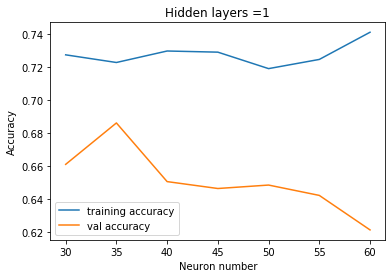

Epoch 1/100
120/120 [==============================] - 0s 862us/step - loss: 0.6765 - accuracy: 0.5720
Epoch 2/100
120/120 [==============================] - 0s 869us/step - loss: 0.6208 - accuracy: 0.6736
Epoch 3/100
120/120 [==============================] - 0s 846us/step - loss: 0.5956 - accuracy: 0.6957
Epoch 4/100
120/120 [==============================] - 0s 867us/step - loss: 0.5838 - accuracy: 0.7026
Epoch 5/100
120/120 [==============================] - 0s 886us/step - loss: 0.5789 - accuracy: 0.7059
Epoch 6/100
120/120 [==============================] - 0s 874us/step - loss: 0.5744 - accuracy: 0.7036
Epoch 7/100
120/120 [==============================] - 0s 1ms/step - loss: 0.5722 - accuracy: 0.7126
Epoch 8/100
120/120 [==============================] - 0s 866us/step - loss: 0.5702 - accuracy: 0.7075
Epoch 9/100
120/120 [==============================] - 0s 816us/step - loss: 0.5678 - accuracy: 0.7124
Epoch 10/100
120/120 [==============================] - 0s 784us/step - los

120/120 [==============================] - 0s 895us/step - loss: 0.5275 - accuracy: 0.7358
Epoch 53/100
120/120 [==============================] - 0s 837us/step - loss: 0.5279 - accuracy: 0.7386
Epoch 54/100
120/120 [==============================] - 0s 811us/step - loss: 0.5271 - accuracy: 0.7361
Epoch 55/100
120/120 [==============================] - 0s 794us/step - loss: 0.5289 - accuracy: 0.7358
Epoch 56/100
120/120 [==============================] - 0s 809us/step - loss: 0.5239 - accuracy: 0.7403
Epoch 57/100
120/120 [==============================] - 0s 810us/step - loss: 0.5248 - accuracy: 0.7375
Epoch 58/100
120/120 [==============================] - 0s 900us/step - loss: 0.5234 - accuracy: 0.7354
Epoch 59/100
120/120 [==============================] - 0s 857us/step - loss: 0.5213 - accuracy: 0.7407
Epoch 60/100
120/120 [==============================] - 0s 823us/step - loss: 0.5209 - accuracy: 0.7391
Epoch 61/100
120/120 [==============================] - 0s 855us/step - loss:

120/120 [==============================] - 0s 806us/step - loss: 0.5772 - accuracy: 0.7071
Epoch 7/100
120/120 [==============================] - 0s 854us/step - loss: 0.5751 - accuracy: 0.7101
Epoch 8/100
120/120 [==============================] - 0s 841us/step - loss: 0.5728 - accuracy: 0.7101
Epoch 9/100
120/120 [==============================] - 0s 809us/step - loss: 0.5688 - accuracy: 0.7108
Epoch 10/100
120/120 [==============================] - 0s 878us/step - loss: 0.5719 - accuracy: 0.7075
Epoch 11/100
120/120 [==============================] - 0s 868us/step - loss: 0.5668 - accuracy: 0.7145
Epoch 12/100
120/120 [==============================] - 0s 918us/step - loss: 0.5641 - accuracy: 0.7156
Epoch 13/100
120/120 [==============================] - 0s 872us/step - loss: 0.5636 - accuracy: 0.7166
Epoch 14/100
120/120 [==============================] - 0s 801us/step - loss: 0.5627 - accuracy: 0.7168
Epoch 15/100
120/120 [==============================] - 0s 863us/step - loss: 0.

120/120 [==============================] - 0s 893us/step - loss: 0.4799 - accuracy: 0.7588
Epoch 62/100
120/120 [==============================] - 0s 846us/step - loss: 0.4779 - accuracy: 0.7614
Epoch 63/100
120/120 [==============================] - 0s 883us/step - loss: 0.4768 - accuracy: 0.7637
Epoch 64/100
120/120 [==============================] - 0s 850us/step - loss: 0.4741 - accuracy: 0.7607
Epoch 65/100
120/120 [==============================] - 0s 844us/step - loss: 0.4734 - accuracy: 0.7611
Epoch 66/100
120/120 [==============================] - 0s 926us/step - loss: 0.4704 - accuracy: 0.7593
Epoch 67/100
120/120 [==============================] - 0s 842us/step - loss: 0.4682 - accuracy: 0.7656
Epoch 68/100
120/120 [==============================] - 0s 860us/step - loss: 0.4646 - accuracy: 0.7725
Epoch 69/100
120/120 [==============================] - 0s 861us/step - loss: 0.4657 - accuracy: 0.7653
Epoch 70/100
120/120 [==============================] - 0s 875us/step - loss:

120/120 [==============================] - 0s 907us/step - loss: 0.5523 - accuracy: 0.7189
Epoch 16/100
120/120 [==============================] - 0s 815us/step - loss: 0.5520 - accuracy: 0.7177
Epoch 17/100
120/120 [==============================] - 0s 915us/step - loss: 0.5541 - accuracy: 0.7208
Epoch 18/100
120/120 [==============================] - 0s 834us/step - loss: 0.5509 - accuracy: 0.7210
Epoch 19/100
120/120 [==============================] - 0s 899us/step - loss: 0.5496 - accuracy: 0.7191
Epoch 20/100
120/120 [==============================] - 0s 947us/step - loss: 0.5479 - accuracy: 0.7233
Epoch 21/100
120/120 [==============================] - 0s 834us/step - loss: 0.5502 - accuracy: 0.7196
Epoch 22/100
120/120 [==============================] - 0s 861us/step - loss: 0.5454 - accuracy: 0.7170
Epoch 23/100
120/120 [==============================] - 0s 837us/step - loss: 0.5423 - accuracy: 0.7240
Epoch 24/100
120/120 [==============================] - 0s 865us/step - loss:

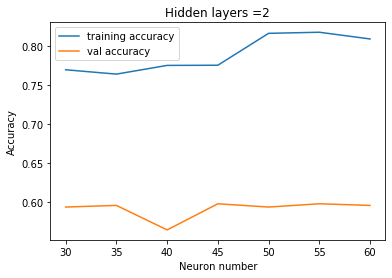

Epoch 1/100
120/120 [==============================] - 0s 855us/step - loss: 0.6478 - accuracy: 0.6474
Epoch 2/100
120/120 [==============================] - 0s 906us/step - loss: 0.6051 - accuracy: 0.6783
Epoch 3/100
120/120 [==============================] - 0s 939us/step - loss: 0.5902 - accuracy: 0.6982
Epoch 4/100
120/120 [==============================] - 0s 961us/step - loss: 0.5811 - accuracy: 0.7033
Epoch 5/100
120/120 [==============================] - 0s 953us/step - loss: 0.5758 - accuracy: 0.7064
Epoch 6/100
120/120 [==============================] - 0s 889us/step - loss: 0.5724 - accuracy: 0.7145
Epoch 7/100
120/120 [==============================] - 0s 898us/step - loss: 0.5683 - accuracy: 0.7129
Epoch 8/100
120/120 [==============================] - 0s 912us/step - loss: 0.5665 - accuracy: 0.7166
Epoch 9/100
120/120 [==============================] - 0s 930us/step - loss: 0.5627 - accuracy: 0.7175
Epoch 10/100
120/120 [==============================] - 0s 912us/step - l

120/120 [==============================] - 0s 945us/step - loss: 0.4438 - accuracy: 0.7916
Epoch 57/100
120/120 [==============================] - 0s 916us/step - loss: 0.4433 - accuracy: 0.7890
Epoch 58/100
120/120 [==============================] - 0s 946us/step - loss: 0.4443 - accuracy: 0.7853
Epoch 59/100
120/120 [==============================] - 0s 937us/step - loss: 0.4366 - accuracy: 0.7885
Epoch 60/100
120/120 [==============================] - 0s 929us/step - loss: 0.4389 - accuracy: 0.7955
Epoch 61/100
120/120 [==============================] - 0s 865us/step - loss: 0.4317 - accuracy: 0.7985
Epoch 62/100
120/120 [==============================] - 0s 874us/step - loss: 0.4259 - accuracy: 0.7974
Epoch 63/100
120/120 [==============================] - 0s 921us/step - loss: 0.4291 - accuracy: 0.7918
Epoch 64/100
120/120 [==============================] - 0s 885us/step - loss: 0.4297 - accuracy: 0.7967
Epoch 65/100
120/120 [==============================] - 0s 906us/step - loss:

Epoch 1/100
120/120 [==============================] - 0s 887us/step - loss: 0.6411 - accuracy: 0.6416
Epoch 2/100
120/120 [==============================] - 0s 929us/step - loss: 0.5948 - accuracy: 0.6929
Epoch 3/100
120/120 [==============================] - 0s 899us/step - loss: 0.5803 - accuracy: 0.7013
Epoch 4/100
120/120 [==============================] - 0s 925us/step - loss: 0.5708 - accuracy: 0.7068
Epoch 5/100
120/120 [==============================] - 0s 944us/step - loss: 0.5673 - accuracy: 0.7094
Epoch 6/100
120/120 [==============================] - 0s 932us/step - loss: 0.5640 - accuracy: 0.7122
Epoch 7/100
120/120 [==============================] - 0s 946us/step - loss: 0.5591 - accuracy: 0.7212
Epoch 8/100
120/120 [==============================] - 0s 947us/step - loss: 0.5533 - accuracy: 0.7228
Epoch 9/100
120/120 [==============================] - 0s 950us/step - loss: 0.5504 - accuracy: 0.7163
Epoch 10/100
120/120 [==============================] - 0s 954us/step - l

120/120 [==============================] - 0s 960us/step - loss: 0.3928 - accuracy: 0.8187
Epoch 54/100
120/120 [==============================] - 0s 909us/step - loss: 0.3931 - accuracy: 0.8143
Epoch 55/100
120/120 [==============================] - 0s 940us/step - loss: 0.3886 - accuracy: 0.8227
Epoch 56/100
120/120 [==============================] - 0s 922us/step - loss: 0.3835 - accuracy: 0.8217
Epoch 57/100
120/120 [==============================] - 0s 942us/step - loss: 0.3779 - accuracy: 0.8301
Epoch 58/100
120/120 [==============================] - 0s 921us/step - loss: 0.3779 - accuracy: 0.8199
Epoch 59/100
120/120 [==============================] - 0s 922us/step - loss: 0.3750 - accuracy: 0.8299
Epoch 60/100
120/120 [==============================] - 0s 945us/step - loss: 0.3707 - accuracy: 0.8292
Epoch 61/100
120/120 [==============================] - 0s 968us/step - loss: 0.3710 - accuracy: 0.8282
Epoch 62/100
120/120 [==============================] - 0s 980us/step - loss:

120/120 [==============================] - 0s 973us/step - loss: 0.5574 - accuracy: 0.7180
Epoch 8/100
120/120 [==============================] - 0s 990us/step - loss: 0.5525 - accuracy: 0.7210
Epoch 9/100
120/120 [==============================] - 0s 953us/step - loss: 0.5488 - accuracy: 0.7266
Epoch 10/100
120/120 [==============================] - 0s 1ms/step - loss: 0.5446 - accuracy: 0.7214
Epoch 11/100
120/120 [==============================] - 0s 988us/step - loss: 0.5434 - accuracy: 0.7224
Epoch 12/100
120/120 [==============================] - 0s 984us/step - loss: 0.5361 - accuracy: 0.7296
Epoch 13/100
120/120 [==============================] - 0s 922us/step - loss: 0.5346 - accuracy: 0.7263
Epoch 14/100
120/120 [==============================] - 0s 942us/step - loss: 0.5286 - accuracy: 0.7370
Epoch 15/100
120/120 [==============================] - 0s 920us/step - loss: 0.5266 - accuracy: 0.7384
Epoch 16/100
120/120 [==============================] - 0s 1ms/step - loss: 0.525

120/120 [==============================] - 0s 988us/step - loss: 0.2115 - accuracy: 0.9174
Epoch 87/100
120/120 [==============================] - 0s 948us/step - loss: 0.2084 - accuracy: 0.9167
Epoch 88/100
120/120 [==============================] - 0s 1ms/step - loss: 0.2022 - accuracy: 0.9213
Epoch 89/100
120/120 [==============================] - 0s 947us/step - loss: 0.1984 - accuracy: 0.9197
Epoch 90/100
120/120 [==============================] - 0s 956us/step - loss: 0.2135 - accuracy: 0.9111
Epoch 91/100
120/120 [==============================] - 0s 972us/step - loss: 0.1966 - accuracy: 0.9250
Epoch 92/100
120/120 [==============================] - 0s 891us/step - loss: 0.1880 - accuracy: 0.9271
Epoch 93/100
120/120 [==============================] - 0s 918us/step - loss: 0.2009 - accuracy: 0.9192
Epoch 94/100
120/120 [==============================] - 0s 917us/step - loss: 0.1868 - accuracy: 0.9257
Epoch 95/100
120/120 [==============================] - 0s 963us/step - loss: 0

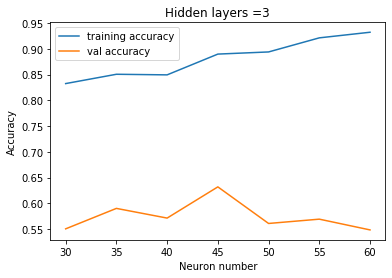

Epoch 1/100
120/120 [==============================] - 0s 850us/step - loss: 0.6444 - accuracy: 0.6509
Epoch 2/100
120/120 [==============================] - 0s 910us/step - loss: 0.5964 - accuracy: 0.6903
Epoch 3/100
120/120 [==============================] - 0s 914us/step - loss: 0.5850 - accuracy: 0.6957
Epoch 4/100
120/120 [==============================] - 0s 986us/step - loss: 0.5774 - accuracy: 0.6985
Epoch 5/100
120/120 [==============================] - 0s 1ms/step - loss: 0.5724 - accuracy: 0.7008
Epoch 6/100
120/120 [==============================] - 0s 948us/step - loss: 0.5754 - accuracy: 0.7026
Epoch 7/100
120/120 [==============================] - 0s 938us/step - loss: 0.5657 - accuracy: 0.7071
Epoch 8/100
120/120 [==============================] - 0s 954us/step - loss: 0.5621 - accuracy: 0.7080
Epoch 9/100
120/120 [==============================] - 0s 950us/step - loss: 0.5643 - accuracy: 0.7075
Epoch 10/100
120/120 [==============================] - 0s 942us/step - los

Epoch 56/100
120/120 [==============================] - 0s 967us/step - loss: 0.3444 - accuracy: 0.8487
Epoch 57/100
120/120 [==============================] - 0s 1ms/step - loss: 0.3418 - accuracy: 0.8514
Epoch 58/100
120/120 [==============================] - 0s 973us/step - loss: 0.3366 - accuracy: 0.8521
Epoch 59/100
120/120 [==============================] - 0s 924us/step - loss: 0.3292 - accuracy: 0.8556
Epoch 60/100
120/120 [==============================] - 0s 990us/step - loss: 0.3285 - accuracy: 0.8558
Epoch 61/100
120/120 [==============================] - 0s 939us/step - loss: 0.3254 - accuracy: 0.8579
Epoch 62/100
120/120 [==============================] - 0s 907us/step - loss: 0.3189 - accuracy: 0.8614
Epoch 63/100
120/120 [==============================] - 0s 931us/step - loss: 0.3202 - accuracy: 0.8598
Epoch 64/100
120/120 [==============================] - 0s 911us/step - loss: 0.3220 - accuracy: 0.8607
Epoch 65/100
120/120 [==============================] - 0s 984us/s

120/120 [==============================] - 0s 996us/step - loss: 0.5559 - accuracy: 0.7240
Epoch 10/100
120/120 [==============================] - 0s 956us/step - loss: 0.5544 - accuracy: 0.7252
Epoch 11/100
120/120 [==============================] - 0s 966us/step - loss: 0.5507 - accuracy: 0.7254
Epoch 12/100
120/120 [==============================] - 0s 952us/step - loss: 0.5466 - accuracy: 0.7279
Epoch 13/100
120/120 [==============================] - 0s 961us/step - loss: 0.5440 - accuracy: 0.7300
Epoch 14/100
120/120 [==============================] - 0s 954us/step - loss: 0.5430 - accuracy: 0.7331
Epoch 15/100
120/120 [==============================] - 0s 944us/step - loss: 0.5353 - accuracy: 0.7368
Epoch 16/100
120/120 [==============================] - 0s 973us/step - loss: 0.5291 - accuracy: 0.7377
Epoch 17/100
120/120 [==============================] - 0s 959us/step - loss: 0.5281 - accuracy: 0.7384
Epoch 18/100
120/120 [==============================] - 0s 970us/step - loss:

120/120 [==============================] - 0s 1ms/step - loss: 0.2043 - accuracy: 0.9197
Epoch 89/100
120/120 [==============================] - 0s 1ms/step - loss: 0.2134 - accuracy: 0.9141
Epoch 90/100
120/120 [==============================] - 0s 1ms/step - loss: 0.2098 - accuracy: 0.9123
Epoch 91/100
120/120 [==============================] - 0s 1ms/step - loss: 0.1948 - accuracy: 0.9195
Epoch 92/100
120/120 [==============================] - 0s 1ms/step - loss: 0.1940 - accuracy: 0.9208
Epoch 93/100
120/120 [==============================] - 0s 1ms/step - loss: 0.2098 - accuracy: 0.9169
Epoch 94/100
120/120 [==============================] - 0s 1ms/step - loss: 0.1955 - accuracy: 0.9183
Epoch 95/100
120/120 [==============================] - 0s 1ms/step - loss: 0.1860 - accuracy: 0.9278
Epoch 96/100
120/120 [==============================] - 0s 1ms/step - loss: 0.2056 - accuracy: 0.9157
Epoch 97/100
120/120 [==============================] - 0s 972us/step - loss: 0.1872 - accuracy

Epoch 66/100
120/120 [==============================] - 0s 1ms/step - loss: 0.2155 - accuracy: 0.9148
Epoch 67/100
120/120 [==============================] - 0s 1ms/step - loss: 0.2185 - accuracy: 0.9106
Epoch 68/100
120/120 [==============================] - 0s 1ms/step - loss: 0.2216 - accuracy: 0.9069
Epoch 69/100
120/120 [==============================] - 0s 1ms/step - loss: 0.2135 - accuracy: 0.9104
Epoch 70/100
120/120 [==============================] - 0s 1ms/step - loss: 0.2233 - accuracy: 0.9092
Epoch 71/100
120/120 [==============================] - 0s 1ms/step - loss: 0.2054 - accuracy: 0.9155
Epoch 72/100
120/120 [==============================] - 0s 1ms/step - loss: 0.2218 - accuracy: 0.9039
Epoch 73/100
120/120 [==============================] - 0s 1ms/step - loss: 0.2221 - accuracy: 0.9071
Epoch 74/100
120/120 [==============================] - 0s 1ms/step - loss: 0.1975 - accuracy: 0.9204
Epoch 75/100
120/120 [==============================] - 0s 1ms/step - loss: 0.1903

120/120 [==============================] - 0s 1ms/step - loss: 0.4396 - accuracy: 0.7853
Epoch 23/100
120/120 [==============================] - 0s 941us/step - loss: 0.4408 - accuracy: 0.7855
Epoch 24/100
120/120 [==============================] - 0s 1ms/step - loss: 0.4321 - accuracy: 0.7909
Epoch 25/100
120/120 [==============================] - 0s 1ms/step - loss: 0.4204 - accuracy: 0.7948
Epoch 26/100
120/120 [==============================] - 0s 1ms/step - loss: 0.4096 - accuracy: 0.8071
Epoch 27/100
120/120 [==============================] - 0s 1ms/step - loss: 0.4003 - accuracy: 0.8122
Epoch 28/100
120/120 [==============================] - 0s 1ms/step - loss: 0.3970 - accuracy: 0.8136
Epoch 29/100
120/120 [==============================] - 0s 1ms/step - loss: 0.3956 - accuracy: 0.8138
Epoch 30/100
120/120 [==============================] - 0s 1ms/step - loss: 0.3832 - accuracy: 0.8201
Epoch 31/100
120/120 [==============================] - 0s 1ms/step - loss: 0.3803 - accuracy

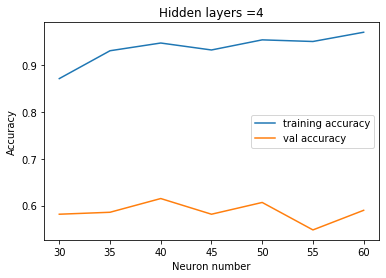

<Figure size 432x288 with 0 Axes>

In [23]:
%matplotlib inline
callbacks = EarlyStopping(monitor='loss', 
                   patience=7,
                   restore_best_weights=True)

hiddenlayers=[1,2,3,4]
denselayers=[30,35,40,45,50,55,60]
#for loops to plot evaluation of model with 
#each hidden layer with each neurons number in 'denselayers'
#This will take some time
for x in hiddenlayers:
        training_accuracy=[]
        val_accuracy=[]
        for d in denselayers:
            model = get_model(14,x,d,'relu',False,0)
            model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
            results =model.fit(X_train, y_train, epochs=100, batch_size=36,callbacks=callbacks)
            training_accuracy.append(model.evaluate(X_train, y_train)[1])
            val_accuracy.append(model.evaluate(X_val, y_val)[1])
        plt.plot(range(len(denselayers)), training_accuracy, label="training accuracy")
        plt.title('Dense Layers ='+str(d) )
        plt.xticks(np.arange(7),denselayers)
        plt.plot(range(len(denselayers)),val_accuracy, label="val accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("Neuron number")
        plt.title('Hidden layers ='+str(x))
        plt.legend()
        plt.show()
        plt.savefig('plot1'+str(x)+'.png')

Epoch 1/100
120/120 [==============================] - 0s 1ms/step - loss: 0.6726 - accuracy: 0.5868
Epoch 2/100
120/120 [==============================] - 0s 965us/step - loss: 0.6462 - accuracy: 0.6546
Epoch 3/100
120/120 [==============================] - 0s 1ms/step - loss: 0.6324 - accuracy: 0.6597
Epoch 4/100
120/120 [==============================] - 0s 1ms/step - loss: 0.6188 - accuracy: 0.6695
Epoch 5/100
120/120 [==============================] - 0s 1ms/step - loss: 0.6148 - accuracy: 0.6722
Epoch 6/100
120/120 [==============================] - 0s 1ms/step - loss: 0.6088 - accuracy: 0.6820
Epoch 7/100
120/120 [==============================] - 0s 898us/step - loss: 0.6060 - accuracy: 0.6885
Epoch 8/100
120/120 [==============================] - 0s 909us/step - loss: 0.6016 - accuracy: 0.6873
Epoch 9/100
120/120 [==============================] - 0s 944us/step - loss: 0.5941 - accuracy: 0.6927
Epoch 10/100
120/120 [==============================] - 0s 972us/step - loss: 0.594

120/120 [==============================] - 0s 1ms/step - loss: 0.5654 - accuracy: 0.7110
Epoch 41/100
120/120 [==============================] - 0s 1ms/step - loss: 0.5659 - accuracy: 0.7140
Epoch 42/100
120/120 [==============================] - 0s 1ms/step - loss: 0.5676 - accuracy: 0.7159
Epoch 43/100
120/120 [==============================] - 0s 1ms/step - loss: 0.5664 - accuracy: 0.7138
Epoch 44/100
120/120 [==============================] - 0s 1ms/step - loss: 0.5636 - accuracy: 0.7187
Epoch 45/100
120/120 [==============================] - 0s 1ms/step - loss: 0.5665 - accuracy: 0.7119
Epoch 46/100
120/120 [==============================] - 0s 1ms/step - loss: 0.5647 - accuracy: 0.7175
Epoch 47/100
120/120 [==============================] - 0s 1ms/step - loss: 0.5660 - accuracy: 0.7101
Epoch 48/100
120/120 [==============================] - 0s 1ms/step - loss: 0.5664 - accuracy: 0.7075
Epoch 49/100
120/120 [==============================] - 0s 1ms/step - loss: 0.5614 - accuracy: 

120/120 [==============================] - 0s 1ms/step - loss: 0.5783 - accuracy: 0.7043
Epoch 18/100
120/120 [==============================] - 0s 1ms/step - loss: 0.5774 - accuracy: 0.7089
Epoch 19/100
120/120 [==============================] - 0s 1ms/step - loss: 0.5773 - accuracy: 0.7073
Epoch 20/100
120/120 [==============================] - 0s 1ms/step - loss: 0.5760 - accuracy: 0.7068
Epoch 21/100
120/120 [==============================] - 0s 1ms/step - loss: 0.5753 - accuracy: 0.7045
Epoch 22/100
120/120 [==============================] - 0s 1ms/step - loss: 0.5714 - accuracy: 0.7117
Epoch 23/100
120/120 [==============================] - 0s 1ms/step - loss: 0.5765 - accuracy: 0.7052
Epoch 24/100
120/120 [==============================] - 0s 1ms/step - loss: 0.5732 - accuracy: 0.7054
Epoch 25/100
120/120 [==============================] - 0s 1ms/step - loss: 0.5715 - accuracy: 0.7068
Epoch 26/100
120/120 [==============================] - 0s 1ms/step - loss: 0.5712 - accuracy: 

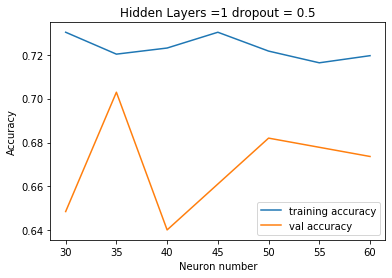

Epoch 1/100
120/120 [==============================] - 0s 1ms/step - loss: 0.6857 - accuracy: 0.5608
Epoch 2/100
120/120 [==============================] - 0s 1ms/step - loss: 0.6559 - accuracy: 0.6247
Epoch 3/100
120/120 [==============================] - 0s 1ms/step - loss: 0.6381 - accuracy: 0.6493
Epoch 4/100
120/120 [==============================] - 0s 1ms/step - loss: 0.6287 - accuracy: 0.6578
Epoch 5/100
120/120 [==============================] - 0s 1ms/step - loss: 0.6203 - accuracy: 0.6678
Epoch 6/100
120/120 [==============================] - 0s 1ms/step - loss: 0.6162 - accuracy: 0.6713
Epoch 7/100
120/120 [==============================] - 0s 1ms/step - loss: 0.6124 - accuracy: 0.6811
Epoch 8/100
120/120 [==============================] - 0s 1ms/step - loss: 0.6073 - accuracy: 0.6825
Epoch 9/100
120/120 [==============================] - 0s 1ms/step - loss: 0.6049 - accuracy: 0.6873
Epoch 10/100
120/120 [==============================] - 0s 1ms/step - loss: 0.6014 - accura

15/15 [==============================] - 0s 818us/step - loss: 0.6473 - accuracy: 0.6674
Epoch 1/100
120/120 [==============================] - 0s 1ms/step - loss: 0.6683 - accuracy: 0.6005
Epoch 2/100
120/120 [==============================] - 0s 1ms/step - loss: 0.6322 - accuracy: 0.6616
Epoch 3/100
120/120 [==============================] - 0s 1ms/step - loss: 0.6196 - accuracy: 0.6701
Epoch 4/100
120/120 [==============================] - 0s 1ms/step - loss: 0.6093 - accuracy: 0.6727
Epoch 5/100
120/120 [==============================] - 0s 1ms/step - loss: 0.6042 - accuracy: 0.6822
Epoch 6/100
120/120 [==============================] - 0s 1ms/step - loss: 0.6028 - accuracy: 0.6883
Epoch 7/100
120/120 [==============================] - 0s 1ms/step - loss: 0.5941 - accuracy: 0.6855
Epoch 8/100
120/120 [==============================] - 0s 1ms/step - loss: 0.5929 - accuracy: 0.6934
Epoch 9/100
120/120 [==============================] - 0s 1ms/step - loss: 0.5920 - accuracy: 0.6943
Ep

120/120 [==============================] - 0s 1ms/step - loss: 0.5193 - accuracy: 0.7365
Epoch 70/100
120/120 [==============================] - 0s 1ms/step - loss: 0.5210 - accuracy: 0.7396
Epoch 71/100
120/120 [==============================] - 0s 1ms/step - loss: 0.5193 - accuracy: 0.7356
Epoch 72/100
120/120 [==============================] - 0s 1ms/step - loss: 0.5091 - accuracy: 0.7456
Epoch 73/100
120/120 [==============================] - 0s 1ms/step - loss: 0.5117 - accuracy: 0.7451
Epoch 74/100
120/120 [==============================] - 0s 1ms/step - loss: 0.5107 - accuracy: 0.7488
Epoch 75/100
120/120 [==============================] - 0s 1ms/step - loss: 0.5132 - accuracy: 0.7437
Epoch 76/100
120/120 [==============================] - 0s 1ms/step - loss: 0.5104 - accuracy: 0.7405
Epoch 77/100
120/120 [==============================] - 0s 1ms/step - loss: 0.5131 - accuracy: 0.7426
Epoch 78/100
120/120 [==============================] - 0s 1ms/step - loss: 0.5095 - accuracy: 

120/120 [==============================] - 0s 2ms/step - loss: 0.5621 - accuracy: 0.7175
Epoch 24/100
120/120 [==============================] - 0s 1ms/step - loss: 0.5587 - accuracy: 0.7194
Epoch 25/100
120/120 [==============================] - 0s 1ms/step - loss: 0.5610 - accuracy: 0.7219
Epoch 26/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5608 - accuracy: 0.7187
Epoch 27/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5563 - accuracy: 0.7235
Epoch 28/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5551 - accuracy: 0.7221
Epoch 29/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5531 - accuracy: 0.7203
Epoch 30/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5541 - accuracy: 0.7189
Epoch 31/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5511 - accuracy: 0.7254
Epoch 32/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5512 - accuracy: 

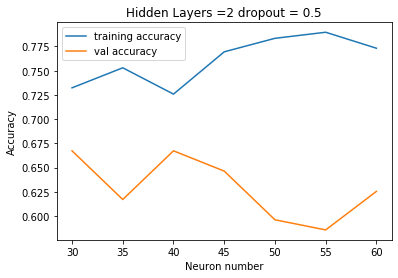

Epoch 1/100
120/120 [==============================] - 0s 1ms/step - loss: 0.6916 - accuracy: 0.5344
Epoch 2/100
120/120 [==============================] - 0s 1ms/step - loss: 0.6639 - accuracy: 0.6144
Epoch 3/100
120/120 [==============================] - 0s 1ms/step - loss: 0.6428 - accuracy: 0.6430
Epoch 4/100
120/120 [==============================] - 0s 1ms/step - loss: 0.6374 - accuracy: 0.6421
Epoch 5/100
120/120 [==============================] - 0s 1ms/step - loss: 0.6269 - accuracy: 0.6639
Epoch 6/100
120/120 [==============================] - 0s 1ms/step - loss: 0.6166 - accuracy: 0.6690
Epoch 7/100
120/120 [==============================] - 0s 1ms/step - loss: 0.6144 - accuracy: 0.6813
Epoch 8/100
120/120 [==============================] - 0s 1ms/step - loss: 0.6062 - accuracy: 0.6862
Epoch 9/100
120/120 [==============================] - 0s 1ms/step - loss: 0.6082 - accuracy: 0.6855
Epoch 10/100
120/120 [==============================] - 0s 1ms/step - loss: 0.6002 - accura

120/120 [==============================] - 0s 1ms/step - loss: 0.5434 - accuracy: 0.7298
Epoch 60/100
120/120 [==============================] - 0s 1ms/step - loss: 0.5408 - accuracy: 0.7331
Epoch 61/100
120/120 [==============================] - 0s 1ms/step - loss: 0.5483 - accuracy: 0.7249
Epoch 62/100
120/120 [==============================] - 0s 1ms/step - loss: 0.5402 - accuracy: 0.7300
Epoch 63/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5355 - accuracy: 0.7351
Epoch 64/100
120/120 [==============================] - 0s 1ms/step - loss: 0.5344 - accuracy: 0.7409
Epoch 65/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5365 - accuracy: 0.7324
Epoch 66/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5341 - accuracy: 0.7377
Epoch 67/100
120/120 [==============================] - 0s 1ms/step - loss: 0.5309 - accuracy: 0.7377
Epoch 68/100
120/120 [==============================] - 0s 1ms/step - loss: 0.5363 - accuracy: 

120/120 [==============================] - 0s 2ms/step - loss: 0.5733 - accuracy: 0.7149
Epoch 23/100
120/120 [==============================] - 0s 1ms/step - loss: 0.5775 - accuracy: 0.7145
Epoch 24/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5667 - accuracy: 0.7124
Epoch 25/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5715 - accuracy: 0.7147
Epoch 26/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5725 - accuracy: 0.7156
Epoch 27/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5715 - accuracy: 0.7184
Epoch 28/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5617 - accuracy: 0.7180
Epoch 29/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5612 - accuracy: 0.7261
Epoch 30/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5610 - accuracy: 0.7226
Epoch 31/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5579 - accuracy: 

15/15 [==============================] - 0s 855us/step - loss: 0.9439 - accuracy: 0.5921
Epoch 1/100
120/120 [==============================] - 0s 2ms/step - loss: 0.6768 - accuracy: 0.5768
Epoch 2/100
120/120 [==============================] - 0s 2ms/step - loss: 0.6448 - accuracy: 0.6372
Epoch 3/100
120/120 [==============================] - 0s 2ms/step - loss: 0.6260 - accuracy: 0.6636
Epoch 4/100
120/120 [==============================] - 0s 2ms/step - loss: 0.6172 - accuracy: 0.6699
Epoch 5/100
120/120 [==============================] - 0s 2ms/step - loss: 0.6069 - accuracy: 0.6857
Epoch 6/100
120/120 [==============================] - 0s 2ms/step - loss: 0.6043 - accuracy: 0.6811
Epoch 7/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5997 - accuracy: 0.6862
Epoch 8/100
120/120 [==============================] - 0s 2ms/step - loss: 0.6034 - accuracy: 0.6890
Epoch 9/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5956 - accuracy: 0.6996
Ep

120/120 [==============================] - 0s 2ms/step - loss: 0.5218 - accuracy: 0.7456
Epoch 58/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5200 - accuracy: 0.7419
Epoch 59/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5133 - accuracy: 0.7442
Epoch 60/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5254 - accuracy: 0.7414
Epoch 61/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5106 - accuracy: 0.7493
Epoch 62/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5174 - accuracy: 0.7481
Epoch 63/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5133 - accuracy: 0.7454
Epoch 64/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5109 - accuracy: 0.7361
Epoch 65/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5073 - accuracy: 0.7474
Epoch 66/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5114 - accuracy: 

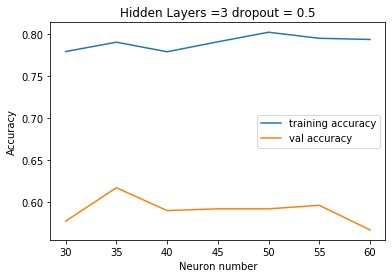

Epoch 1/100
120/120 [==============================] - 0s 2ms/step - loss: 0.6975 - accuracy: 0.5104
Epoch 2/100
120/120 [==============================] - 0s 2ms/step - loss: 0.6751 - accuracy: 0.5836
Epoch 3/100
120/120 [==============================] - 0s 2ms/step - loss: 0.6553 - accuracy: 0.6325
Epoch 4/100
120/120 [==============================] - 0s 2ms/step - loss: 0.6463 - accuracy: 0.6344
Epoch 5/100
120/120 [==============================] - 0s 1ms/step - loss: 0.6397 - accuracy: 0.6479
Epoch 6/100
120/120 [==============================] - 0s 2ms/step - loss: 0.6315 - accuracy: 0.6490
Epoch 7/100
120/120 [==============================] - 0s 2ms/step - loss: 0.6264 - accuracy: 0.6643
Epoch 8/100
120/120 [==============================] - 0s 1ms/step - loss: 0.6220 - accuracy: 0.6699
Epoch 9/100
120/120 [==============================] - 0s 1ms/step - loss: 0.6147 - accuracy: 0.6773
Epoch 10/100
120/120 [==============================] - 0s 2ms/step - loss: 0.6078 - accura

120/120 [==============================] - 0s 2ms/step - loss: 0.5459 - accuracy: 0.7242
Epoch 44/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5445 - accuracy: 0.7238
Epoch 45/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5535 - accuracy: 0.7293
Epoch 46/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5456 - accuracy: 0.7314
Epoch 47/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5477 - accuracy: 0.7300
Epoch 48/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5451 - accuracy: 0.7317
Epoch 49/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5440 - accuracy: 0.7277
Epoch 50/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5461 - accuracy: 0.7314
Epoch 51/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5487 - accuracy: 0.7259
Epoch 52/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5456 - accuracy: 

120/120 [==============================] - 0s 2ms/step - loss: 0.5401 - accuracy: 0.7240
Epoch 54/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5380 - accuracy: 0.7300
Epoch 55/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5428 - accuracy: 0.7266
Epoch 56/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5326 - accuracy: 0.7228
Epoch 57/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5352 - accuracy: 0.7296
Epoch 58/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5221 - accuracy: 0.7354
Epoch 59/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5354 - accuracy: 0.7300
Epoch 60/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5295 - accuracy: 0.7312
Epoch 61/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5238 - accuracy: 0.7428
Epoch 62/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5246 - accuracy: 

120/120 [==============================] - 0s 2ms/step - loss: 0.5581 - accuracy: 0.7226
Epoch 31/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5558 - accuracy: 0.7233
Epoch 32/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5531 - accuracy: 0.7228
Epoch 33/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5524 - accuracy: 0.7252
Epoch 34/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5448 - accuracy: 0.7289: 0s - loss: 0.5396 - accuracy: 
Epoch 35/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5496 - accuracy: 0.7196
Epoch 36/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5477 - accuracy: 0.7226
Epoch 37/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5492 - accuracy: 0.7324
Epoch 38/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5412 - accuracy: 0.7233
Epoch 39/100
120/120 [==============================] - 0s 2ms/

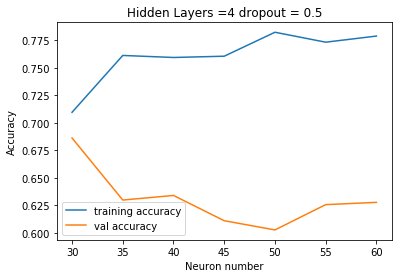

<Figure size 432x288 with 0 Axes>

In [24]:
#repeat for dropouts = 0.5
#for drop outs = 0.5
for x in hiddenlayers:
        training_accuracy=[]
        val_accuracy=[]
        for d in denselayers:
            model = get_model(14,x,d*2,'relu',True,0.5)
            model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
            results =model.fit(X_train, y_train, epochs=100, batch_size=36,callbacks=callbacks)
            training_accuracy.append(model.evaluate(X_train, y_train)[1])
            val_accuracy.append(model.evaluate(X_val, y_val)[1])
        plt.plot(range(len(denselayers)), training_accuracy, label="training accuracy")
        plt.title('Hidden Layers ='+str(x) +' dropout = 0.5')
        plt.xticks(np.arange(9),denselayers)
        plt.plot(range(len(denselayers)),val_accuracy, label="val accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("Neuron number")
        
        plt.legend()
        plt.show()
        plt.savefig('plot2'+str(x)+'.png')

## Part 4: Testing the best models and further evaluation

In [25]:
m4_35= get_model(14,4,35,'relu',False,0.5)
m3_60= get_model(14,3,60,'relu',False,0.5)
m2_30= get_model(14,2,30,'relu',False,0.5)
m1_45= get_model(14,1,45,'relu',False,0.5)
m4_55d= get_model(14,4,55,'relu',True,0.5)
m3_35d= get_model(14,3,35,'relu',True,0.5)
m2_45d= get_model(14,2,45,'relu',True,0.5)
m1_45d= get_model(14,1,45,'relu',True,0.5)

best_models=[m4_35,m3_60,m2_30,m1_45,m4_55d,m3_35d,m2_45d,m1_45d]
#from plots above we pick out best models and evaluate on test set

In [26]:
for m in best_models:
    m.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    m.fit(X_train, y_train, epochs=100, batch_size=36,callbacks=callbacks)

Epoch 1/100
120/120 [==============================] - 0s 1ms/step - loss: 0.6581 - accuracy: 0.6263
Epoch 2/100
120/120 [==============================] - 0s 1ms/step - loss: 0.6017 - accuracy: 0.6852
Epoch 3/100
120/120 [==============================] - 0s 1ms/step - loss: 0.5825 - accuracy: 0.6978
Epoch 4/100
120/120 [==============================] - 0s 1ms/step - loss: 0.5711 - accuracy: 0.7082
Epoch 5/100
120/120 [==============================] - 0s 1ms/step - loss: 0.5664 - accuracy: 0.7156
Epoch 6/100
120/120 [==============================] - 0s 1ms/step - loss: 0.5608 - accuracy: 0.7145
Epoch 7/100
120/120 [==============================] - 0s 1ms/step - loss: 0.5578 - accuracy: 0.7163
Epoch 8/100
120/120 [==============================] - 0s 1ms/step - loss: 0.5535 - accuracy: 0.7203
Epoch 9/100
120/120 [==============================] - 0s 1000us/step - loss: 0.5492 - accuracy: 0.7187
Epoch 10/100
120/120 [==============================] - 0s 1ms/step - loss: 0.5466 - acc

120/120 [==============================] - 0s 967us/step - loss: 0.4046 - accuracy: 0.8071
Epoch 60/100
120/120 [==============================] - 0s 930us/step - loss: 0.3995 - accuracy: 0.8171
Epoch 61/100
120/120 [==============================] - 0s 953us/step - loss: 0.4095 - accuracy: 0.8062
Epoch 62/100
120/120 [==============================] - 0s 977us/step - loss: 0.4031 - accuracy: 0.8071
Epoch 63/100
120/120 [==============================] - 0s 1ms/step - loss: 0.3923 - accuracy: 0.8150
Epoch 64/100
120/120 [==============================] - 0s 987us/step - loss: 0.3980 - accuracy: 0.8113
Epoch 65/100
120/120 [==============================] - 0s 973us/step - loss: 0.3879 - accuracy: 0.8238
Epoch 66/100
120/120 [==============================] - 0s 986us/step - loss: 0.3808 - accuracy: 0.8238
Epoch 67/100
120/120 [==============================] - 0s 974us/step - loss: 0.3793 - accuracy: 0.8213
Epoch 68/100
120/120 [==============================] - 0s 1ms/step - loss: 0.3

120/120 [==============================] - 0s 805us/step - loss: 0.5731 - accuracy: 0.7168
Epoch 18/100
120/120 [==============================] - 0s 894us/step - loss: 0.5731 - accuracy: 0.7129
Epoch 19/100
120/120 [==============================] - 0s 841us/step - loss: 0.5713 - accuracy: 0.7122
Epoch 20/100
120/120 [==============================] - 0s 852us/step - loss: 0.5711 - accuracy: 0.7166
Epoch 21/100
120/120 [==============================] - 0s 959us/step - loss: 0.5696 - accuracy: 0.7156
Epoch 22/100
120/120 [==============================] - 0s 905us/step - loss: 0.5693 - accuracy: 0.7180
Epoch 23/100
120/120 [==============================] - 0s 867us/step - loss: 0.5684 - accuracy: 0.7184
Epoch 24/100
120/120 [==============================] - 0s 941us/step - loss: 0.5670 - accuracy: 0.7143
Epoch 25/100
120/120 [==============================] - 0s 905us/step - loss: 0.5680 - accuracy: 0.7136
Epoch 26/100
120/120 [==============================] - 0s 953us/step - loss:

120/120 [==============================] - 0s 1ms/step - loss: 0.6022 - accuracy: 0.6931
Epoch 18/100
120/120 [==============================] - 0s 1ms/step - loss: 0.6001 - accuracy: 0.6964
Epoch 19/100
120/120 [==============================] - 0s 1ms/step - loss: 0.6006 - accuracy: 0.6876
Epoch 20/100
120/120 [==============================] - 0s 1ms/step - loss: 0.5998 - accuracy: 0.6915
Epoch 21/100
120/120 [==============================] - 0s 1ms/step - loss: 0.5987 - accuracy: 0.6952
Epoch 22/100
120/120 [==============================] - 0s 1ms/step - loss: 0.5993 - accuracy: 0.6890
Epoch 23/100
120/120 [==============================] - 0s 1ms/step - loss: 0.5974 - accuracy: 0.6931
Epoch 24/100
120/120 [==============================] - 0s 1ms/step - loss: 0.5958 - accuracy: 0.6934
Epoch 25/100
120/120 [==============================] - 0s 1ms/step - loss: 0.5926 - accuracy: 0.6950
Epoch 26/100
120/120 [==============================] - 0s 1ms/step - loss: 0.5909 - accuracy: 

120/120 [==============================] - 0s 1ms/step - loss: 0.5562 - accuracy: 0.7210
Epoch 55/100
120/120 [==============================] - 0s 1ms/step - loss: 0.5549 - accuracy: 0.7217
Epoch 56/100
120/120 [==============================] - 0s 981us/step - loss: 0.5532 - accuracy: 0.7224
Epoch 57/100
120/120 [==============================] - 0s 946us/step - loss: 0.5579 - accuracy: 0.7210
Epoch 58/100
120/120 [==============================] - 0s 997us/step - loss: 0.5564 - accuracy: 0.7191
Epoch 59/100
120/120 [==============================] - 0s 1ms/step - loss: 0.5581 - accuracy: 0.7205
Epoch 60/100
120/120 [==============================] - 0s 973us/step - loss: 0.5531 - accuracy: 0.7317
Epoch 61/100
120/120 [==============================] - 0s 1ms/step - loss: 0.5586 - accuracy: 0.7249
Epoch 62/100
120/120 [==============================] - 0s 1ms/step - loss: 0.5560 - accuracy: 0.7214
Epoch 63/100
120/120 [==============================] - 0s 1ms/step - loss: 0.5553 - ac

In [46]:
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.ensemble import RandomForestClassifier


# Add the models to the list that you want to view on the ROC plot
models_labels = [
{'label': 'Layers=4','model':m4_35},
{'label': 'Layers=3','model':m3_60},
{'label':'Layers=2','model':m2_30},
{'label':'Layers=1','model':m1_45},
{'label':'Layers=4, Do','model':m4_55d},
{'label':'Layers=3, Do','model':m3_35d},
{'label':'Layers=2 Do','model':m2_45d},
{'label':'Layers=1, Do','model':m1_45d},
]#labels

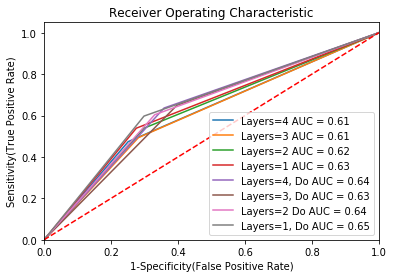

In [47]:
# Below for loop iterates through your models list
for m in models_labels:
    model = m['model'] # select the model
    y_pred=model.predict_classes(X_test).ravel()# predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Calculate Area under the curve to display on the plot
    auc = metrics.auc(fpr,tpr)
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s AUC = %0.2f' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Part 4.1: Testing Against Random Forest and Confusion Matrixes

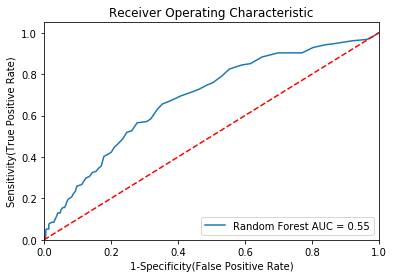

In [45]:
model= RandomForestClassifier()
model.fit(X_train,y_train)
## using randomforest to test our models against simpler model

y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
auc = metrics.roc_auc_score(y_test,model.predict(X_test))
# Now, plot the computed values
plt.plot(fpr, tpr, label='%s AUC = %0.2f' % ('Random Forest', auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()  

In [30]:
from sklearn.metrics import confusion_matrix

Measures=['Sensitivity','Specificity','PPV','NPV']

senss=[]#sensitivity or recall or true positive rate
specs=[]#specificity or true negative rate
npv=[]#negative predictive value
ppv=[]
for m in models_labels:
    models=m['model']
    y_pred = models.predict_classes(X_test)
    y_true = y_test
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()#splitting into true negative, false posit
    
    senss.append(tp/(tp+fn))# formulas, appending to the list
    specs.append(tn/(tn+fp))
    npv.append(tn/(tn+fn))
    ppv.append(tp/(fp+tp))


In [31]:
rf=RandomForestClassifier()# repeat for RF
rf.fit(X_train,y_train)#fitting into ML model
y_pred = rf.predict(X_test)
y_true = y_test
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
senss.append(tp/(tp+fn))
specs.append(tn/(tn+fp))
npv.append(tn/(tn+fn))
ppv.append(tp/(fp+tp))

In [70]:
scores=np.array([senss,specs,ppv,npv])

In [71]:
scores=pd.DataFrame(scores,columns=('Layers=4','Layers=3','Layers=2','Layers=1',
               'Layers=4,Do','Layers=3,Do','Layers=2,Do','Layers=1,Do','RF'))

In [72]:
scores.insert(0, 'Measure', Measures)

In [73]:
display(scores)# scores of our models

,Measure,Layers=4,Layers=3,Layers=2,Layers=1,"Layers=4,Do","Layers=3,Do","Layers=2,Do","Layers=1,Do",RF
0,Sensitivity,0.474026,0.493506,0.538961,0.538961,0.636364,0.649351,0.603896,0.597403,0.149351
1,Specificity,0.748724,0.718112,0.701531,0.724490,0.641582,0.603316,0.669643,0.701531,0.960459
2,PPV,0.270370,0.255892,0.261830,0.277592,0.258575,0.243309,0.264205,0.282209,0.425926
3,NPV,0.878743,0.878315,0.885668,0.888889,0.899821,0.897533,0.895904,0.898693,0.851810


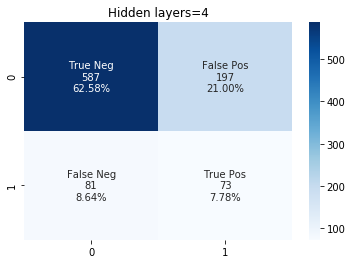

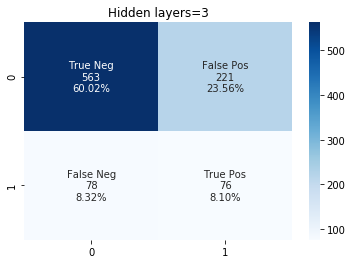

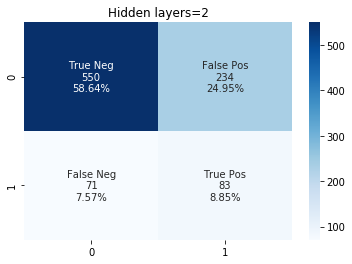

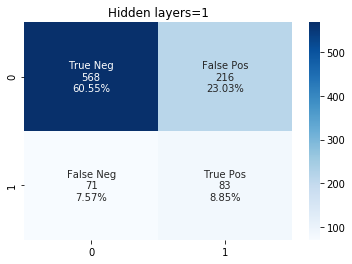

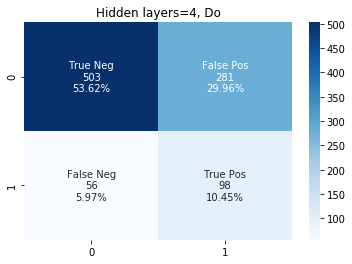

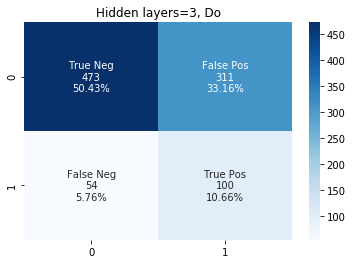

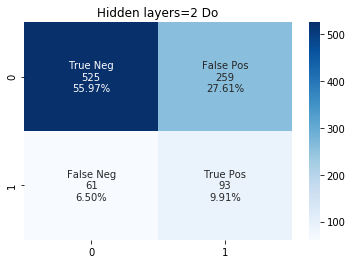

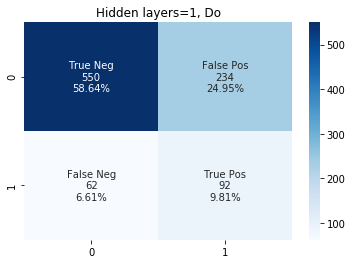

In [41]:
import seaborn as sns## confusion matrixes
for m in models_labels:
    model = m['model']
    y_pred = model.predict_classes(X_test).ravel()#have model predict test set
    y_true = y_test
    
    cf_matrix = confusion_matrix(y_true,y_pred)# use sklearn metrics to plot TPR, FPR, TNR and FNR
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
                    cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                         cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
    plt.title(m['label'])
    plt.show()

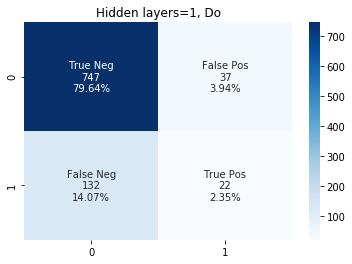

In [43]:
    model = RandomForestClassifier()# repeat for RF
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_true = y_test
    
    cf_matrix = confusion_matrix(y_true,y_pred)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
                    cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                         cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
    plt.title(m['label'])
    plt.show()